In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
dataset = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
dataset.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [ ]:
dataset.shape

(1470, 35)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
Features_to_transe=list(('WorkLifeBalance', 'StockOptionLevel' ,'RelationshipSatisfaction' ,'PerformanceRating' ,'JobSatisfaction' ,'JobInvolvement','EnvironmentSatisfaction','Education','JobLevel'))
dataset[Features_to_transe] = dataset[Features_to_transe].astype('category')

In [ ]:
# Create a dictionary for mapping the values in each column
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environment_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating_map = { 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
Job_Level_map={1: 'Entry', 2: 'Junior', 3: 'Mid-Level', 4: 'Senior', 5: 'Executive'}
stock_option_map = {0: 'No stock options granted', 
                    1: 'Stock options granted at a discount', 
                    2: 'Stock options granted at market price', 
                    3: 'Stock options granted at a premium price'}

# Use the map function to replace the values in each column
dataset['Education'] = dataset['Education'].map(education_map)
dataset['EnvironmentSatisfaction'] = dataset['EnvironmentSatisfaction'].map(environment_satisfaction_map)
dataset['JobInvolvement'] = dataset['JobInvolvement'].map(job_involvement_map)
dataset['JobSatisfaction'] = dataset['JobSatisfaction'].map(job_satisfaction_map)
dataset['PerformanceRating'] = dataset['PerformanceRating'].map(performance_rating_map)
dataset['RelationshipSatisfaction'] = dataset['RelationshipSatisfaction'].map(relationship_satisfaction_map)
dataset['WorkLifeBalance'] = dataset['WorkLifeBalance'].map(work_life_balance_map)
dataset['JobLevel'] = dataset['JobLevel'].map(Job_Level_map)
dataset['StockOptionLevel'] = dataset['StockOptionLevel'].map(stock_option_map)

In [ ]:
Num_features=list(dataset.select_dtypes(include=['float64','int64']).columns)
Num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
cat_features=list((dataset.select_dtypes(exclude=['float64','int64']).columns))
print(cat_features )
print(Features_to_transe)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
['WorkLifeBalance', 'StockOptionLevel', 'RelationshipSatisfaction', 'PerformanceRating', 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction', 'Education', 'JobLevel']


In [ ]:
for cat in cat_features:
    unique_vals = dataset[cat].unique()
    print(f"The unique values in '{cat}' variable are:")
    print(" ")
    for val in unique_vals:
        print(val)
    print("\n")

The unique values in 'Attrition' variable are:
 
Yes
No


The unique values in 'BusinessTravel' variable are:
 
Travel_Rarely
Travel_Frequently
Non-Travel


The unique values in 'Department' variable are:
 
Sales
Research & Development
Human Resources


The unique values in 'Education' variable are:
 
College
Below College
Master
Bachelor
Doctor


The unique values in 'EducationField' variable are:
 
Life Sciences
Other
Medical
Marketing
Technical Degree
Human Resources


The unique values in 'EnvironmentSatisfaction' variable are:
 
Medium
High
Very High
Low


The unique values in 'Gender' variable are:
 
Female
Male


The unique values in 'JobInvolvement' variable are:
 
High
Medium
Very High
Low


The unique values in 'JobLevel' variable are:
 
Junior
Entry
Mid-Level
Senior
Executive


The unique values in 'JobRole' variable are:
 
Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Director


Visualisation

In [ ]:
# Create the plot 
fig = px.histogram(dataset, x='Age',
                   title='Age Countplot')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.update_traces(marker=dict(color='green'))

# Display the plot 
fig.show(renderer='kaggle')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import plotly.graph_objects as go

# Assuming `dataset` is your DataFrame containing the data
# Count the values in the 'JobSatisfaction' column
satisfaction_counts = dataset['JobSatisfaction'].value_counts()
# Count the values in the 'MaritalStatus' column
marital_status_counts = dataset['MaritalStatus'].value_counts()
# Count the values in the 'JobLevel' column
job_level_counts = dataset['JobLevel'].value_counts()
PerformanceRating_counts=dataset['PerformanceRating'].value_counts()
# Count the values in the 'Gender' column
gender_counts = dataset['Gender'].value_counts()
RelationshipSatisfaction_counts=dataset['RelationshipSatisfaction'].value_counts()
WorkLifeBalance_counts=dataset['WorkLifeBalance'].value_counts()
OverTime_counts=dataset['OverTime'].value_counts()
JobRole_counts=dataset['JobRole'].value_counts()
Department_counts=dataset['Department'].value_counts()
EducationField_counts=dataset['EducationField'].value_counts()
BusinessTravel_counts=dataset['BusinessTravel'].value_counts()

# Create a list of chart types to be used for each subplot
                #0     #1     #2     #3     #4     #5      #6    #7      #8     #9     #10   #11
chart_types = ['Bar', 'Pie', 'Pie', 'Pie', 'Bar', 'Pie', 'Pie', 'Bar', 'Pie', 'Pie', 'Pie', 'Bar']

fig = make_subplots(rows=4, cols=3, subplot_titles=('<b>Proportion Of Gender<b>', '<b>Proportion Of Job Satisfaction<b>',
                                                    '<b>Proportion Of marital status<b>', '<b>Proportion Of job level<b>',
                                                    '<b>PerformanceRating<b>','<b>Relation ship Satisfaction<b>',
                                                   '<b>WorkLifeBalance<b>','<b>OverTime<b>',
                                                   '<b>JobRole<b>','<b>Department<b>',
                                                   '<b>EducationField<b>','<b> Business Travel <b>'),
                    specs=[[{'type': chart_types[0]}, {'type': chart_types[1]}, {'type': chart_types[2]}],
                           [{'type': chart_types[3]}, {'type': chart_types[4]}, {'type': chart_types[5]}],
                           [{'type': chart_types[6]}, {'type': chart_types[7]}, {'type': chart_types[8]}],
                           [{'type': chart_types[9]}, {'type': chart_types[10]}, {'type': chart_types[11]}]
                          ])

fig.add_trace(       #0
    go.Bar(
        x=gender_counts.index,
        y=gender_counts.values,
        text=dataset["Gender"]
        
    ), row=1, col=1
)
                                #1
fig.add_trace(
    go.Pie(
        labels=satisfaction_counts.index,
        values=satisfaction_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'brown', 'purple'],
        pull=[0, 0.08, 0.03, 0.001]
        
    ), row=1, col=2
)
                                       #2
fig.add_trace(
    go.Pie(
        labels=marital_status_counts.index,
        values=marital_status_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=1, col=3
)
                                 #3
fig.add_trace( 
    go.Pie(
        labels=job_level_counts.index,
        values=job_level_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red', 'black'],
        pull=[0, 0.08, 0.03, 0.001]
        
    ), row=2, col=1
)


                                                #4
fig.add_trace(
    go.Bar(
         x=PerformanceRating_counts.index,
         y=PerformanceRating_counts.values,
         text=dataset['PerformanceRating']
    ), row=2, col=2
)
                                                #5
fig.add_trace(
    go.Pie(
        labels=RelationshipSatisfaction_counts.index,
        values=RelationshipSatisfaction_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=2, col=3
)
                                                #6
fig.add_trace(
    go.Pie(
        labels=WorkLifeBalance_counts.index,
        values=WorkLifeBalance_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=3, col=1
)
                                                #7
fig.add_trace(
    go.Bar(
        x=OverTime_counts.index,
        y=OverTime_counts.values,
        text=dataset['OverTime']
    ), row=3, col=2
)
                                                #8
fig.add_trace(
    go.Pie(
        labels=JobRole_counts.index,
        values=JobRole_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red','Lime','Coral','Violet','Yellow','JAM'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=3, col=3
)
                                                #9
fig.add_trace(
    go.Pie(
        labels=Department_counts.index,
        values=Department_counts.values,
        hole=0.1,
        marker_colors=['Lime','Violet','JAM'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=4, col=1
)
                                                    #10
fig.add_trace(
    go.Pie(
        labels=EducationField_counts.index,
        values=EducationField_counts.values,
        hole=0.1,
        marker_colors=['Lime','Violet','JAM','blue', 'red','green'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=4, col=2
)
                                                    #11
fig.add_trace(
    go.Bar(
        x=BusinessTravel_counts.index,
        y=BusinessTravel_counts.values,
        text=dataset['BusinessTravel']
        
    ), row=4, col=3
)
fig.update_layout(
    title='<b>Distributions<b>',
    showlegend=True,
    height=900,  # Adjust the height
    width=1250,   # Adjust the width
    margin=dict(l=10, r=10, t=50, b=10)  # Adjust the margin
)

fig.show()

In [ ]:
fig = px.histogram(dataset, x="Attrition", category_orders=dict(GeAttritionnder=["Male", "Female"]), color='Gender' ,title='Attrition and Gender')
fig.show()

Text(0.5, 1.0, 'Performance Rating by Age and Gender')

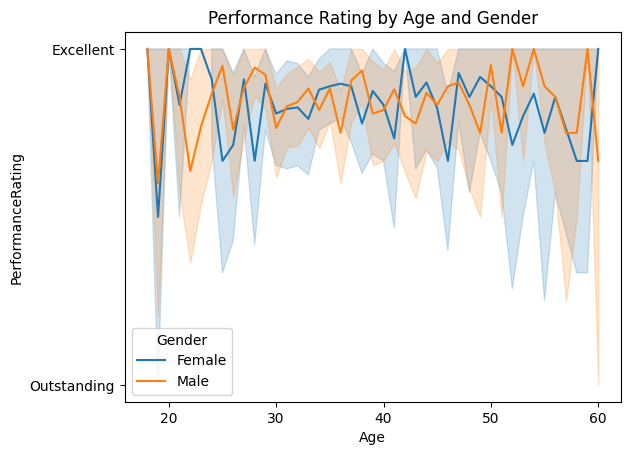

In [ ]:
%matplotlib inline  


sns.lineplot(x='Age', y='PerformanceRating',hue='Gender'  ,data=dataset)
plt.title('Performance Rating by Age and Gender')

In [ ]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [28]:
dataset.corr()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,NaN,-0.010145,0.024287,0.497855,0.028051,0.299635,0.003634,NaN,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,NaN,-0.050990,0.023381,0.007707,-0.032182,0.038153,0.022704,NaN,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,NaN,0.032916,0.031131,-0.017014,0.027473,-0.029251,0.040235,NaN,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,NaN,1.000000,0.035179,-0.014829,0.012648,-0.001251,-0.012944,NaN,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
HourlyRate,0.024287,0.023381,0.031131,NaN,0.035179,1.000000,-0.015794,-0.015297,0.022157,-0.009062,NaN,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
MonthlyIncome,0.497855,0.007707,-0.017014,NaN,-0.014829,-0.015794,1.000000,0.034814,0.149515,-0.027269,NaN,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,NaN,0.012648,-0.015297,0.034814,1.000000,0.017521,-0.006429,NaN,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,NaN,-0.001251,0.022157,0.149515,0.017521,1.000000,-0.010238,NaN,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,NaN,-0.012944,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,NaN,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985
